### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with

In [106]:
from tensorflow import keras
from keras import datasets
import numpy as np

# Load the dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

# Shapes of the training and test sets
print("Training images shape", train_images.shape)
print("Training labels shape", train_labels.shape)
print("Test images shape", test_images.shape)
print("Test labels shape", test_labels.shape)

# Find the number of unique labels
unique_labels_count = len(np.unique(train_labels))
print("Number of unique labels", unique_labels_count)

Training images shape (60000, 28, 28)
Training labels shape (60000,)
Test images shape (10000, 28, 28)
Test labels shape (10000,)
Number of unique labels 10


In [107]:
# Preprocessing the data
# Reshape the images from 28x28 to 28x28x1 to indicate that the images are in a greyscale
# Scale the images to values between 0 and 255

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255

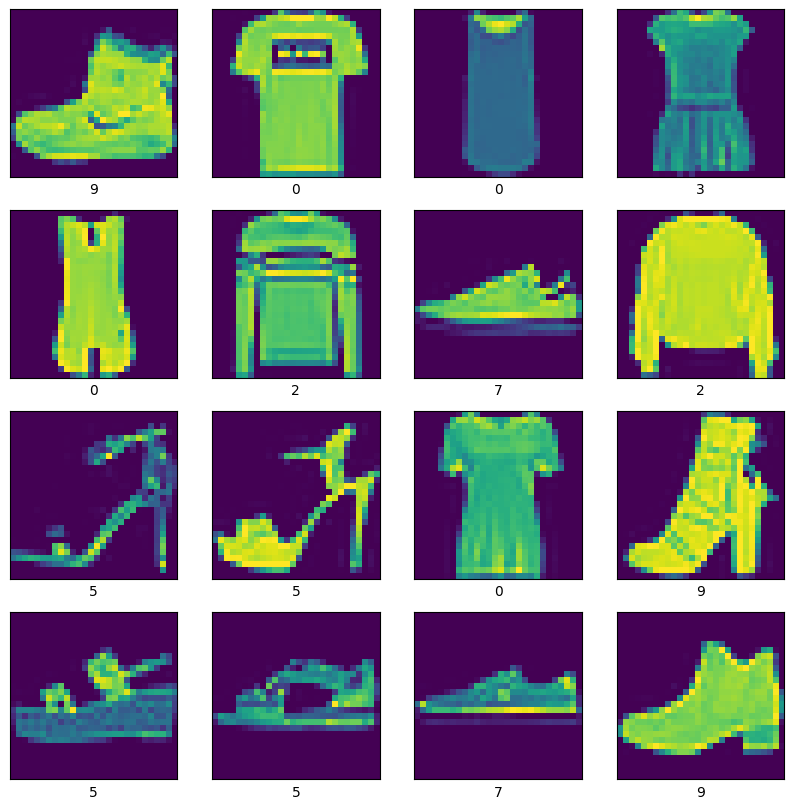

In [108]:
import matplotlib.pyplot as plt

# Displaying a few images from the dataset
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

### 2. Train a dense neural network using Keras, try out at least three hyperparameters configurations 

In [109]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers.legacy import SGD
from sklearn.metrics import confusion_matrix

In [110]:
# Build and Compile Model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(unique_labels_count, activation='softmax'))

model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7586 - accuracy: 0.7499
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5274 - accuracy: 0.8198
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4852 - accuracy: 0.8322
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4646 - accuracy: 0.8402
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4503 - accuracy: 0.8437
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4412 - accuracy: 0.8475
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4345 - accuracy: 0.8501
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4288 - accuracy: 0.8526
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4243 - accuracy: 0.8534
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.42

In [111]:
# Evaluate the model on the test set observing the loss and accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.4565 - accuracy: 0.8379
Test Loss: 0.4565177261829376
Test Accuracy: 0.8378999829292297


In [112]:
# Make predictions on the test set
y_pred = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


### 3. Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and  specific examples of incorrect classification, and drew some conclusions from this exploration

In [113]:
# Find the predicted labels
predicted_labels = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:", "\n" ,cm)

Confusion Matrix: 
 [[751   4  14  67   3   1 143   0  17   0]
 [  3 955   3  30   3   0   4   0   2   0]
 [ 15   5 716  14 130   1 108   0  11   0]
 [ 19  12  12 883  25   0  45   0   4   0]
 [  0   2 102  48 733   1 104   0  10   0]
 [  0   0   0   1   0 911   0  50   6  32]
 [ 97   2 116  52  87   1 616   0  29   0]
 [  0   0   0   0   0  34   0 915   0  51]
 [  4   1   4  10   3   4  25   5 944   0]
 [  0   0   0   0   0  12   0  32   1 955]]


The confusion matrix classifes correctly given the diagonal values. The incorrect classification is observed outside the diagonal values

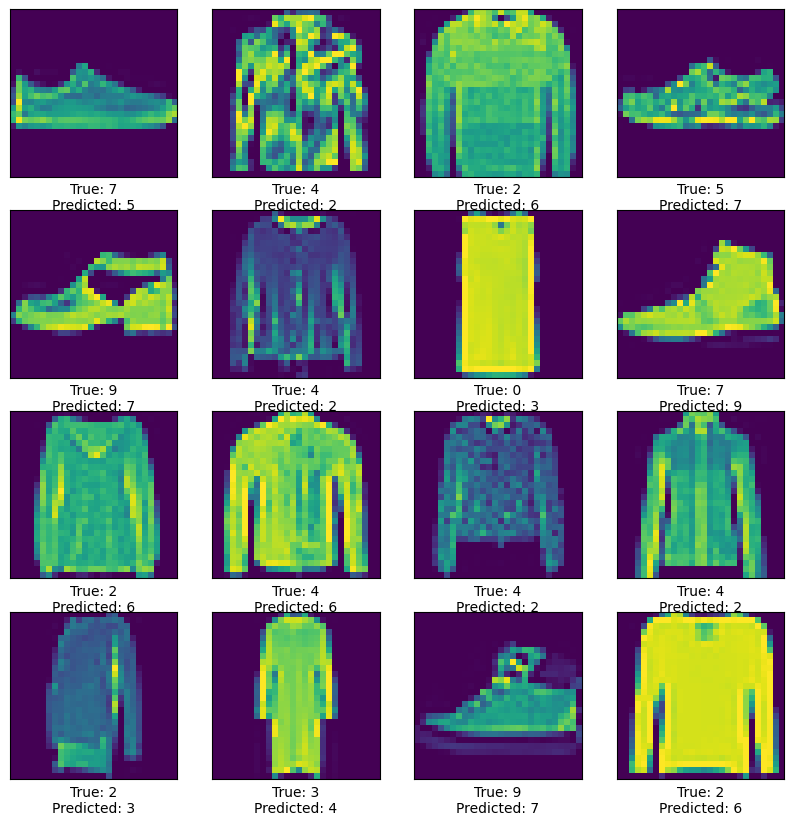

In [114]:
# Find the indices of incorrect classifications
incorrect_indices = np.where(test_labels != predicted_labels)[0]

# Plot the incorrect classifications
plt.figure(figsize=(10, 10))
for i, index in enumerate(incorrect_indices[:16]):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[index].reshape(28, 28))
    plt.xlabel(f"True: {test_labels[index]}\nPredicted: {predicted_labels[index]}")
plt.show()

